In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#데이터 불러오기
iris = load_iris()
data = pd.DataFrame(iris.data,columns=iris.feature_names) 
#데이터프레임 , columns
labels =  pd.DataFrame(iris.target)
#데이터프레임

In [3]:
data.info()
#결측치확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
labels.info()
#결측치확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       150 non-null    int32
dtypes: int32(1)
memory usage: 728.0 bytes


In [5]:
data = pd.concat([data,labels],axis=1)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),0
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## DBSCAN

In [6]:
model = DBSCAN(eps=0.5,min_samples=5)
#모델 선정(DBSCAN,epsilon=0.5,minPts=5)

In [7]:
predict=pd.DataFrame(model.fit_predict(data))
predict.columns=['predict']
#모델 학습, 예측(군집화)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [8]:
predict

,predict
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [9]:
r=pd.concat([data,predict],axis=1)

In [10]:
r

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),0,predict
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


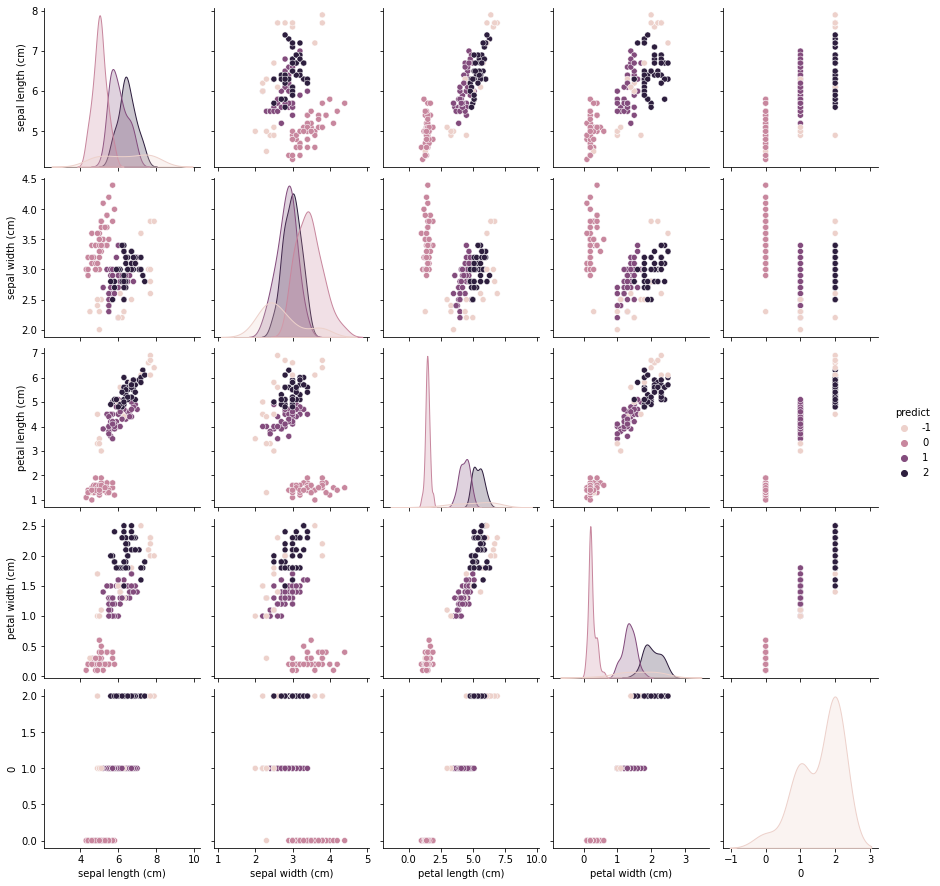

In [11]:
#시각화
sns.pairplot(r,hue='predict') #x축,y축이 열이되서 관계를 표현
plt.show()

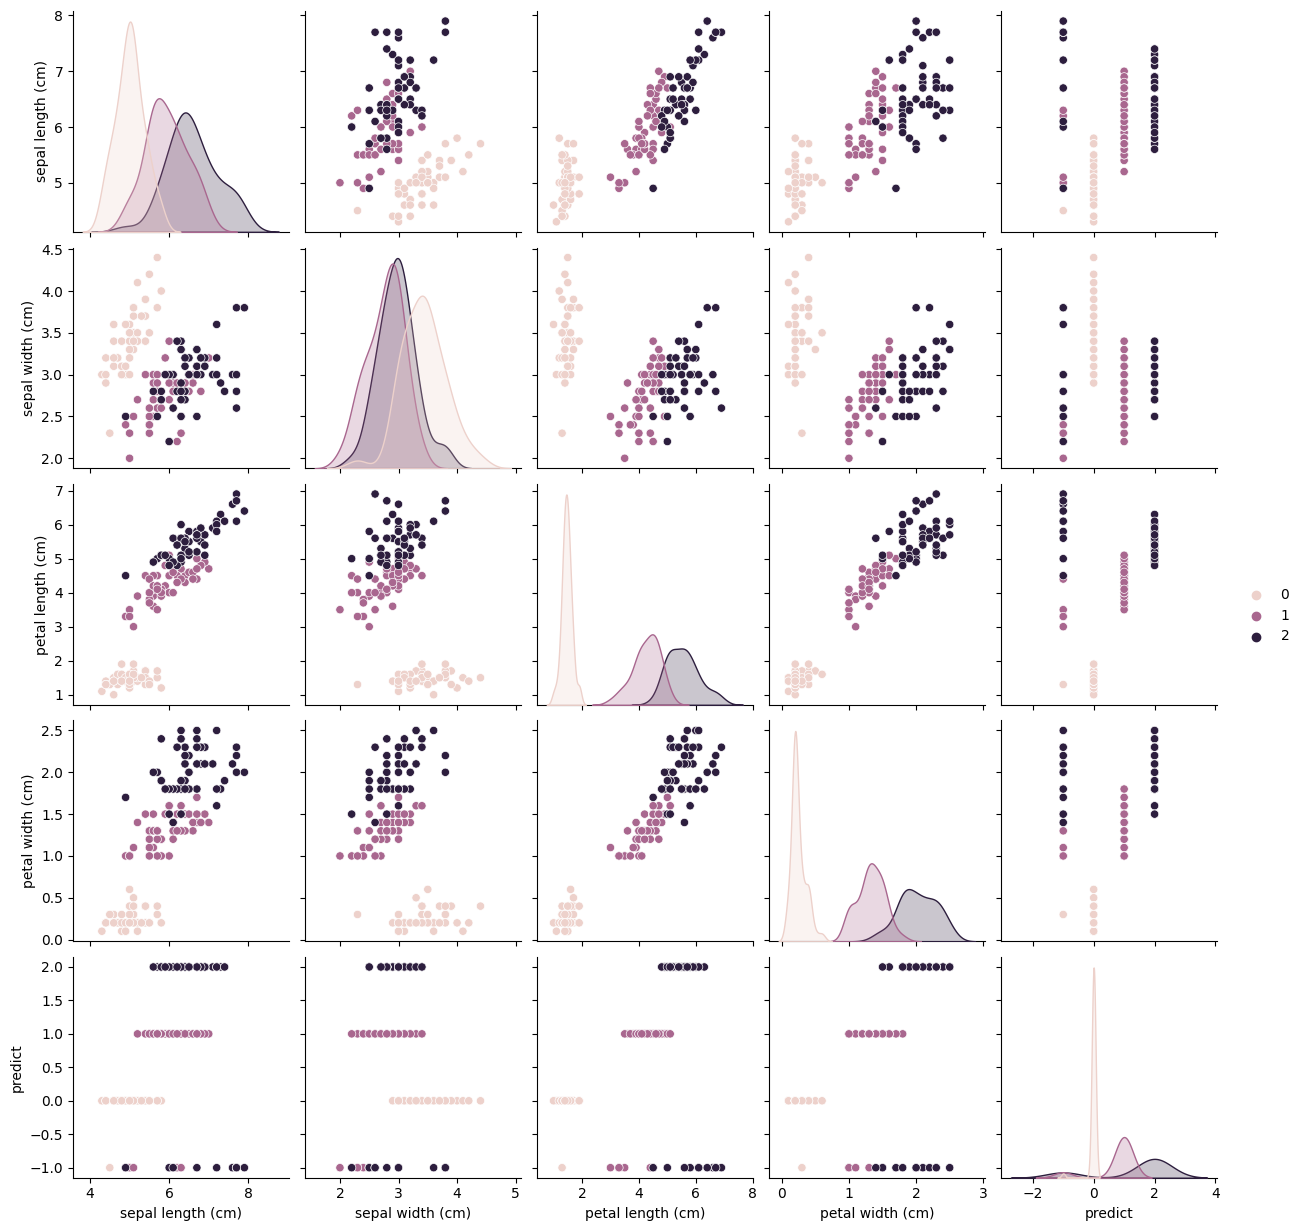

In [12]:
#시각화
sns.pairplot(r,hue=0) #x축,y축이 열이되서 관계를 표현
plt.show()

### K-means

In [13]:
from sklearn.cluster import KMeans

In [14]:
km=KMeans(n_clusters=3,random_state=21) 
#모델 선정
km.fit(data)
#모델 학습

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


KMeans(n_clusters=3, random_state=21)

In [15]:
pred = pd.DataFrame(km.labels_)
pred.columns =['predict']
#예측값을 데이터프레임화

In [16]:
r2 = pd.concat([data,pred],axis=1)
#셀 병합

In [17]:
r2.info()
#결측치 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   0                  150 non-null    int32  
 5   predict            150 non-null    int32  
dtypes: float64(4), int32(2)
memory usage: 6.0 KB


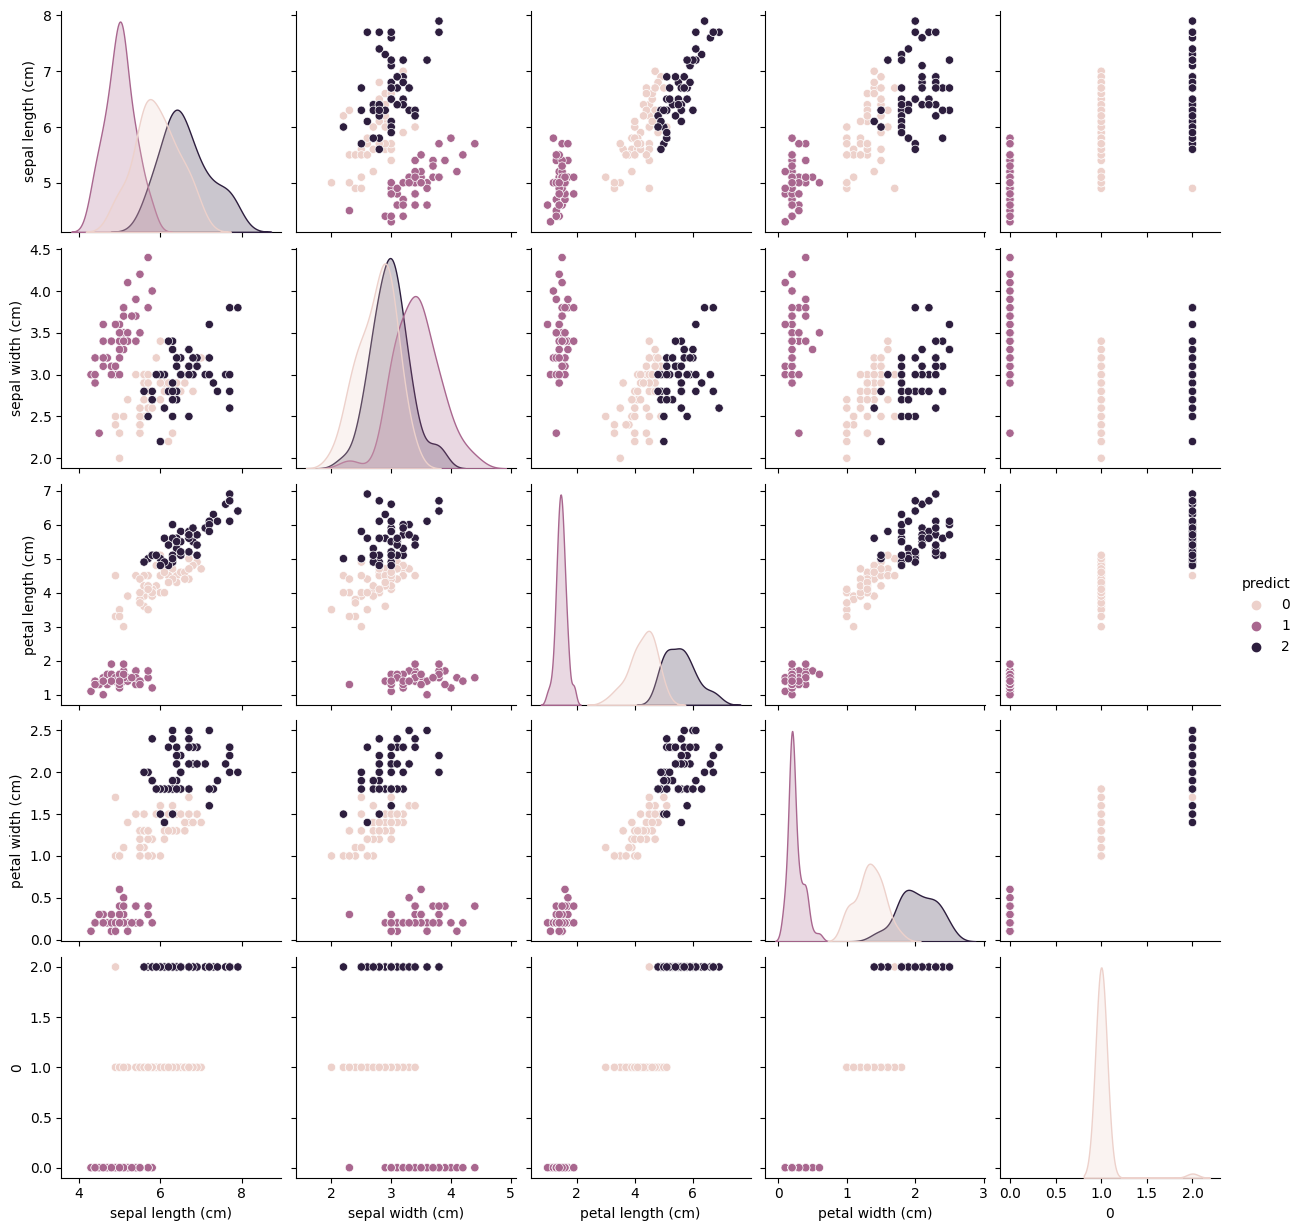

In [18]:
#시각화
sns.pairplot(r2,hue='predict') #x축,y축이 열이되서 관계를 표현
plt.show()

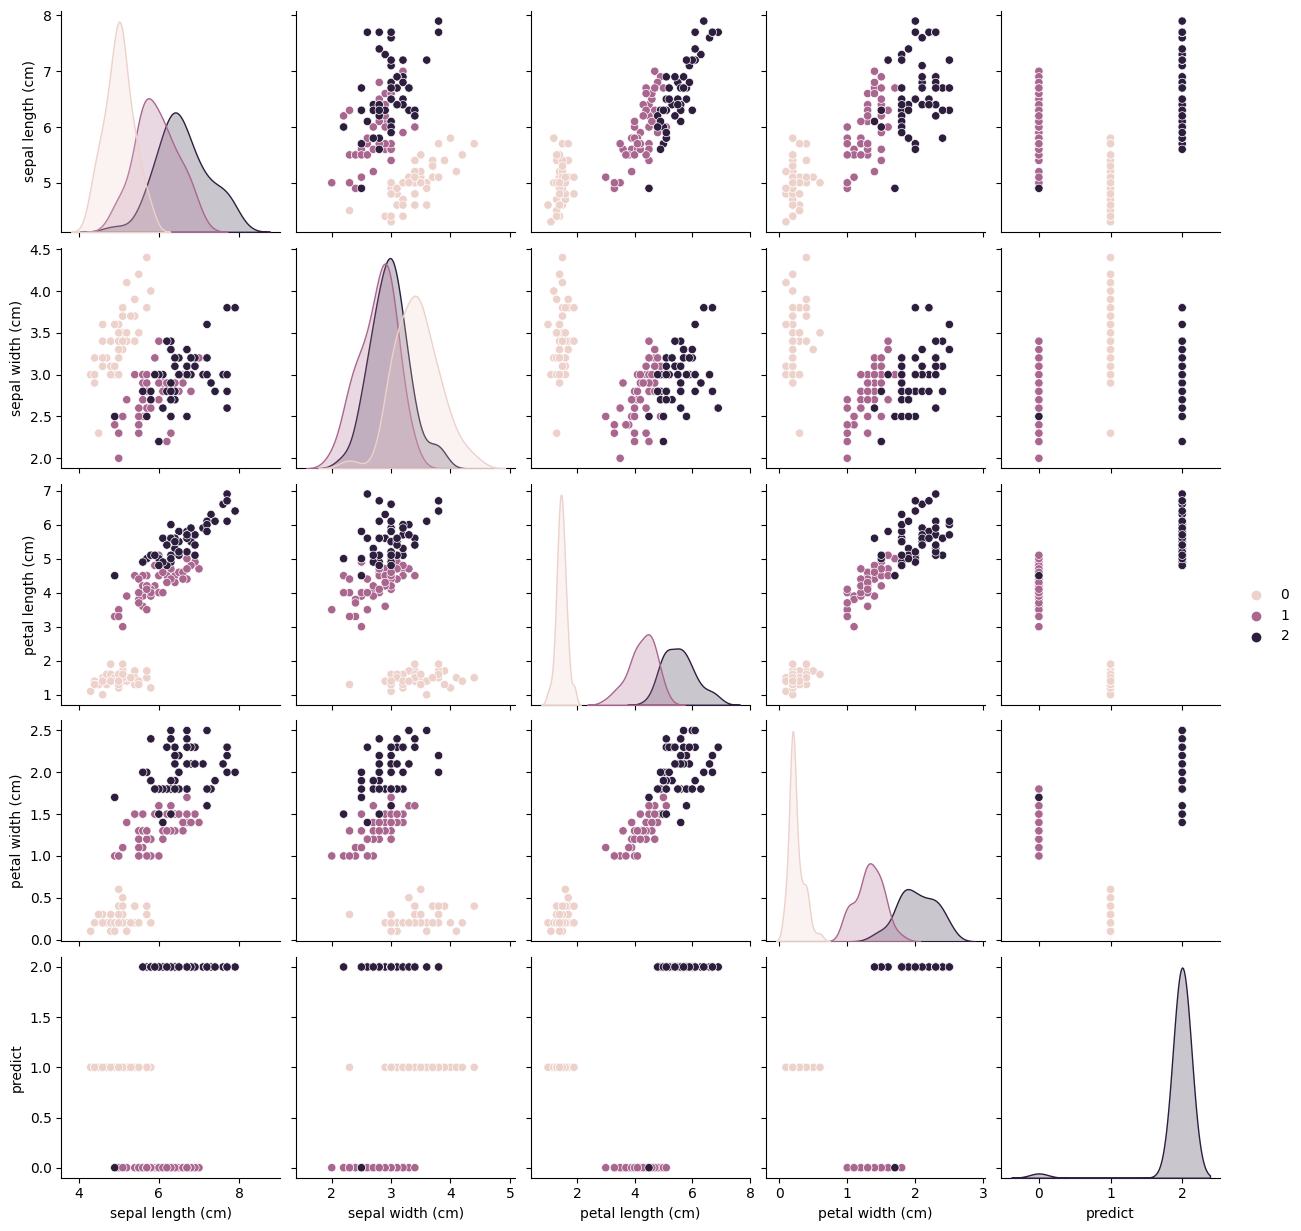

In [19]:
#시각화
sns.pairplot(r2,hue=0) #x축,y축이 열이되서 관계를 표현
plt.show()

- iris 데이터에서 결과가 k-means가 더 좋아보이지만 모든 데이터에서 k-means가 군집분석을 잘한다는 의미는 아님
- 머신러닝에서는 무조건적으로 좋다고 말할 수 있는 모델은 없다 -> 각각 다른 데이터들에 대해서 그 데이터를 분석하고 어떤 알고리즘이 사용하기에 적합한지 판단해야한다.
- 데이터 특성에 맞는 모델을 사용해야한다.